# Here is a simpler process

In [1]:
from platform import python_version
import autokeras as ak
import datetime as dt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
print(python_version())
import scipy
print('scipy:'+scipy.__version__)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import log_loss
import time

3.7.4
scipy:1.7.3


In [2]:
import os

os.getcwd()

'C:\\Users\\shaun'

# Read the file

In [3]:
datapath = r"C:\Users\shaun\OneDrive\Desktop\Feature_Engineering_Project\iris.csv"
#datapath = './'
#filename = 'ionosphere.csv'
df = pd.read_csv(datapath)
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
target = 'Target'

In [5]:
df = df.drop(columns=['Id'],axis=1)

In [6]:
#Extract list of numeric columns
cols = df.select_dtypes([np.number]).columns
cols = list(cols)
#cols.remove('Target')

<AxesSubplot:>

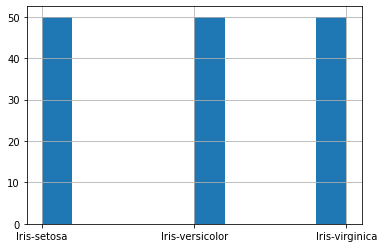

In [7]:
df[target].hist()

In [8]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[[target]].head(1)

,Target
0,0


# Import each tool you are evaluating here

Importing PyImpetus, Eli5, EvolutionaryFS, autofeat ; To Include More from https://www.opensourceagenda.com/tags/feature-selection?page=2

In [9]:
from PyImpetus import PPIMBC
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from EvolutionaryFS import GeneticAlgorithmFS
from zoofs import ParticleSwarmOptimization

import featurewiz as fwiz
from featurewiz import FeatureWiz

from autofeat import FeatureSelector

#from autofeat import AutoFeatRegressor

Imported DASK version = 0.0.90. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


# Define the dataset and target here

In [10]:
preds = [x for x in list(df) if x not in [target]]
len(preds)

4

In [11]:
X = df[preds]
y = df[target]
print(X.shape, y.shape)

(150, 4) (150,)


In [12]:
##get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,
                                                    stratify=y)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [13]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
21,5.1,3.7,1.5,0.4
47,4.6,3.2,1.4,0.2
141,6.9,3.1,5.1,2.3
90,5.5,2.6,4.4,1.2
64,5.6,2.9,3.6,1.3
...,...,...,...,...
41,4.5,2.3,1.3,0.3
93,5.0,2.3,3.3,1.0
26,5.0,3.4,1.6,0.4
3,4.6,3.1,1.5,0.2


In [14]:
#Find categorical columns and object columns to transform into numeric: 
cat_columns = list(X.select_dtypes(['category']).columns)
obj_columns = list(X.select_dtypes(['object']).columns)
len(cat_columns), len(obj_columns)

(0, 0)

In [15]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X_train[each_cat] = LB.fit_transform(X_train[each_cat])
        X_test[each_cat] = LB.transform(X_test[each_cat])
        print(each_cat+' completed transform')

In [16]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X_train[each_col] = scaler.fit_transform(X_train[each_col].values.reshape(-1,1))
    X_test[each_col] = scaler.transform(X_test[each_col].values.reshape(-1,1))
print('completed Min Max Scaling')

completed Min Max Scaling


In [17]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
21,23.00,77.5,9.389831,13.375
47,9.25,55.0,7.711864,5.125
141,72.50,50.5,69.796610,91.750
90,34.00,28.0,58.050847,46.375
64,36.75,41.5,44.627119,50.500


### Since The Tool is not allowed to look at test data, you must only use X_train and y_train for the Tool

In [18]:
train = pd.concat([X_train,y_train],axis=1)
print(train.shape)

(120, 5)


In [19]:
test = pd.concat([X_test,y_test],axis=1)
print(test.shape)

(30, 5)


In [20]:
time_to_fit = pd.DataFrame(columns=['Feature_Engineering_Technique','Start_Time','End_Time','Time_to_fit'])
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (120, 5)
    Caution: We will try to reduce the memory usage of dataframe from 0.01 MB
    Memory usage after optimization is: 0.00 MB
        decreased by 61.4%
     Loaded. Shape = (120, 5)
No test data filename given...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    4 Predictors classified...
        No variables removed since no ID or low-information variab

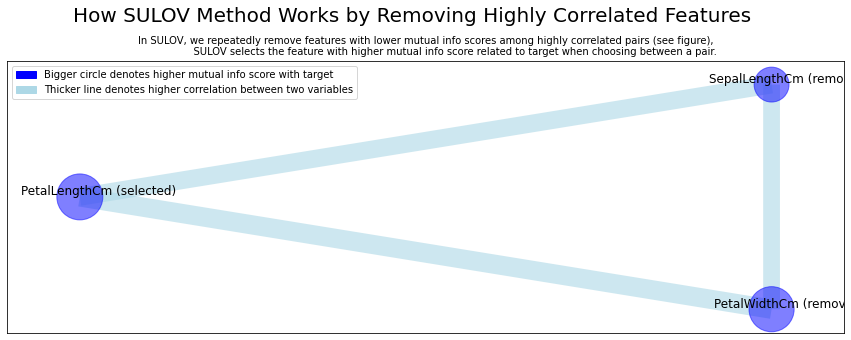

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 2
############## F E A T U R E   S E L E C T I O N  ####################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 2 
XGBoost version: 1.5.1
Number of booster rounds = 100
        using 2 variables...
            Time taken for regular XGBoost feature selection = 0 seconds


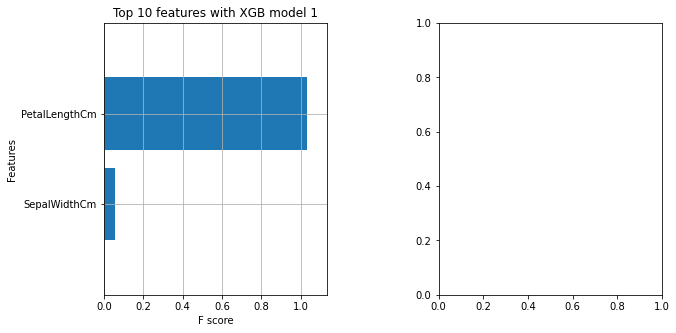

            Total time taken for XGBoost feature selection = 0 seconds
    ID variables are always selected so that rows can be identified. But they are not important!
Selected 2 important features:
['PetalLengthCm', 'SepalWidthCm']
    Time taken = 1 seconds
Returning list of 2 important features and dataframe.
    Time taken to create entire pipeline = 1 second(s)


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643493e+09,1.643493e+09,1.07041


In [21]:
###################################################FeatureWiz#############################################################
### Now run it through featurewiz - remember featurewiz does not look at test data only modifies for numeric
start_featurewiz = time.time()

features = FeatureWiz(corr_limit=0.70, verbose=2, sep=',', header=0, feature_engg='', category_encoders='',dask_xgboost_flag=False, nrows=None)
X_train_selected = features.fit_transform(X_train,y_train)
end_featurewiz = time.time()
diff = end_featurewiz - start_featurewiz
best_columns_featurewiz = features.features
len(best_columns_featurewiz)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureWiz','Start_Time':start_featurewiz,'End_Time':end_featurewiz,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

In [22]:
#################Autofeat#########################

start_autofeat = time.time()
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(X_train, y_train)
end_autofeat = time.time()
diff = end_autofeat - start_autofeat
best_columns_autofeat = list(new_X.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Autofeat','Start_Time':start_autofeat,'End_Time':end_autofeat,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 4 features after 5 feature selection runs
[featsel] 3 features after correlation filtering
[featsel] 3 features after noise filtering


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643493e+09,1.643493e+09,1.07041
1,Autofeat,1.643493e+09,1.643493e+09,0.74807


In [23]:
##############FeatureEngine############
from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()), # drops duplicates
    ('correlation', SmartCorrelatedSelection( # drops correlated
        threshold=0.8,
        selection_method="model_performance",
        estimator=RandomForestClassifier(n_estimators=10, random_state=1),
    )),
])

# find features to remove

start_fe = time.time()
pipe.fit(X_train, y_train)
end_fe = time.time()

diff = end_fe - start_fe

print('Number of original variables: ', X_train.shape[1])

X_train_fe = pipe.transform(X_train)

print('Number of variables after selection: ', X_train_fe.shape[1])

best_columns_fe = list(X_train_fe.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureEngine','Start_Time':start_fe,'End_Time':end_fe,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

Number of original variables:  4
Number of variables after selection:  2


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643493e+09,1.643493e+09,1.070410
1,Autofeat,1.643493e+09,1.643493e+09,0.748070
2,FeatureEngine,1.643493e+09,1.643493e+09,0.203684


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Feature importance:  [13.862943611198906, 13.862943611198906, 10.101743495505344, 4.213961286420002]


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


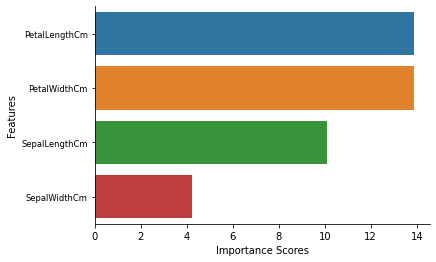

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643493e+09,1.643493e+09,1.070410
1,Autofeat,1.643493e+09,1.643493e+09,0.748070
2,FeatureEngine,1.643493e+09,1.643493e+09,0.203684
3,PyImpetus,1.643493e+09,1.643493e+09,13.471862


In [24]:
####################################################PyImpetus#####################################################
start_pyimpetus = time.time()
model = PPIMBC(LogisticRegression(random_state=27, max_iter=1000, class_weight="balanced"), cv=0, num_simul=20, simul_type=0, simul_size=0.2, sig_test_type="non-parametric", random_state=27, verbose=2, p_val_thresh=0.05)
# Fit this above object on the train part and transform the train dataset into selected feature subset
# NOTE: x_train has to be a dataframe and y_train has to be a numpy array
x_train = model.fit_transform(X_train, y_train.values)
# Transform the test set as well
# Check out the scores of each feature. The scores are in order of the selected feature list
# NOTE: You can use these scores ina feature selection ensemble
print("Feature importance: ", model.feat_imp_scores)
# Plot the feature importance scores
model.feature_importance()
best_columns_pyimpetus = list(x_train.columns)
end_pyimpetus = time.time()
diff = end_pyimpetus - start_pyimpetus
len(x_train.columns)
# Convert the data into numpy arrays
#x_train, x_test = x_train.values, x_test.values
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'PyImpetus','Start_Time':start_pyimpetus,'End_Time':end_pyimpetus,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

#######################################################Eli5##############################################################

sel = SelectFromModel(
    PermutationImportance(SVC(), cv=5),
    threshold=0.05,
).fit(X_train, y_train)
x_train = sel.transform(X_train)
best_columns_eli5 = x_train.columns

TypeError: check_cv() takes from 0 to 2 positional arguments but 3 were given

Time To Generate Features 

In [25]:
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643493e+09,1.643493e+09,1.070410
1,Autofeat,1.643493e+09,1.643493e+09,0.748070
2,FeatureEngine,1.643493e+09,1.643493e+09,0.203684
3,PyImpetus,1.643493e+09,1.643493e+09,13.471862


In [26]:
#############################################EvolutionaryFS#############################################
##get train and test data
data_dict={0:{'x_train':X_train,'y_train':y_train,'x_test':X_test,'y_test':y_test}}
columns_list=list(X.columns)

start_evolutionaryfs = time.time()
model_object=LogisticRegression(n_jobs=-1,random_state=1)
evoObj=GeneticAlgorithmFS(model=model_object,data_dict=data_dict,cost_function=f1_score,average='micro',cost_function_improvement='increase',columns_list=columns_list,generations=20,population=30,prob_crossover=0.9,prob_mutation=0.1,run_time=60000)
best_columns_EvolutionaryFS=evoObj.GetBestFeatures()
end_evolutionaryfs = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs
len(best_columns_EvolutionaryFS)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'EvolutionaryFS','Start_Time':start_evolutionaryfs,'End_Time':end_evolutionaryfs,'Time_to_fit': diff} , ignore_index=True)
time_to_fit.head()

================= Best performance for generation 0 : 1.0 =================
================= Best performance for generation 1 : 1.0 =================
================= Best performance for generation 2 : 1.0 =================
================= Best performance for generation 3 : 1.0 =================
================= Best performance for generation 4 : 1.0 =================
================= Best performance for generation 5 : 1.0 =================
================= Best performance for generation 6 : 1.0 =================
================= Best performance for generation 7 : 1.0 =================
================= Best performance for generation 8 : 1.0 =================
================= Best performance for generation 9 : 1.0 =================
================= Best performance for generation 10 : 1.0 =================
================= Best performance for generation 11 : 1.0 =================
================= Best performance for generation 12 : 1.0 =================
=========

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643493e+09,1.643493e+09,1.070410
1,Autofeat,1.643493e+09,1.643493e+09,0.748070
2,FeatureEngine,1.643493e+09,1.643493e+09,0.203684
3,PyImpetus,1.643493e+09,1.643493e+09,13.471862
4,EvolutionaryFS,1.643493e+09,1.643493e+09,61.549723


In [27]:
#########################################################Zoof##############################################
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value ! 
def objective_function_topass(model,X_train, y_train, X_test, y_test):      
    model.fit(X_train,y_train)  
    P=log_loss(y_test,model.predict_proba(X_test))
    return P
    
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=25,
                                       population_size=20,minimize=True)
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()                                       
# fit the algorithm
start_zoof = time.time()

best_columns_zoof = algo_object.fit(lgb_model,X_train, y_train, X_train, y_train,verbose=True)

end_zoof = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Zoof','Start_Time':start_zoof,'End_Time':end_zoof,'Time_to_fit': diff} , ignore_index=True)

		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 1 	 0.005144172394398943 					 0.0050498638027706025 
Iteration 2 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 3 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 4 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 5 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 6 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 7 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 8 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 9 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 10 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 11 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 12 	 0.0050498638027706025 					 0.0050498638027706025 
Iteration 13 	 0.0050498638027706025 					 0.0050498638027706025 
Ite

In [28]:
###############################Sklearn Genetic Opt##########################################################

import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    scoring="balanced_accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1)

start_gopt = time.time()
# Train and select the features
evolved_estimator.fit(X_train, y_train)
end_gopt = time.time()

diff = end_gopt-start_gopt

# Features selected by the algorithm
best_columns_genetic_opt = list(evolved_estimator.best_features_)
best_columns_genetic_opt = X_train.columns[best_columns_genetic_opt]

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Genetic OPT','Start_Time':start_gopt,'End_Time':end_gopt,'Time_to_fit': diff} , ignore_index=True)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	30    	nan    	nan        	nan        	nan        
1  	60    	nan    	nan        	nan        	nan        
2  	60    	0.820716	0.1348     	0.909646   	0.441392   
3  	60    	0.902605	0.0379175  	0.909646   	0.698413   
4  	60    	0.909646	2.22045e-16	0.909646   	0.909646   
5  	60    	0.909646	2.22045e-16	0.909646   	0.909646   
6  	60    	0.909646	2.22045e-16	0.909646   	0.909646   
7  	60    	0.909646	2.22045e-16	0.909646   	0.909646   
8  	60    	0.909646	2.22045e-16	0.909646   	0.909646   
9  	60    	0.909646	2.22045e-16	0.909646   	0.909646   
10 	60    	0.909646	2.22045e-16	0.909646   	0.909646   
11 	60    	0.909646	2.22045e-16	0.909646   	0.909646   
12 	60    	0.909646	2.22045e-16	0.909646   	0.909646   
13 	60    	0.909646	2.22045e-16	0.909646   	0.909646   
14 	60    	0.909646	2.22045e-16	0.909646   	0.909646   
15 	60    	0.909646	2.22045e-16	0.909646   	0.909646   
16 	60    	0.909646	2.22045e-16	0.909646   	0.90964

In [29]:
##################BorutaPy###################
from boruta import BorutaPy

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

start_bpy = time.time()
feat_selector.fit(X_train.values, y_train)
end_bpy = time.time()

diff = end_bpy-start_bpy

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

best_columns_borutapy = list(X_train.loc[:,feat_selector.support_].columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaPy','Start_Time':start_bpy,'End_Time':end_bpy,'Time_to_fit': diff} , ignore_index=True)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	0


In [30]:
#################BorutaShap##################

from BorutaShap import BorutaShap

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

start_bshap = time.time()
Feature_Selector.fit(X=X_train, y=y_train, n_trials=100, sample=False,train_or_test = 'test', normalize=True,verbose=True)
end_bshap = time.time()

diff = end_bshap-start_bshap

# check selected features - first 5 features are selected
subset = Feature_Selector.Subset()

best_columns_borutashap = list(subset.columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaShap','Start_Time':start_bshap,'End_Time':end_bshap,'Time_to_fit': diff} , ignore_index=True)

  0%|          | 0/100 [00:00<?, ?it/s]

3 attributes confirmed important: ['PetalLengthCm', 'SepalLengthCm', 'PetalWidthCm']
1 attributes confirmed unimportant: ['SepalWidthCm']
0 tentative attributes remains: []


In [31]:
#Create a dictionary of lists with feature engineering technique
fs = {"FeatureWiz":best_columns_featurewiz,"Autofeat":best_columns_autofeat,"FeatureEngine":best_columns_fe,"PyImpetus":best_columns_pyimpetus,"EvolutionaryFS":best_columns_EvolutionaryFS,"Zoof":best_columns_zoof, "Genetic OPT":best_columns_genetic_opt, "BorutaPy":best_columns_borutapy, "BorutaShap":best_columns_borutashap}
#fs

# Here is an even simpler way to do multi fold cross validation
## First set a baseline performance by including all features in model
## Then compare that model to feature selection by EvolutionaryFS

## The baseline model with all features yields a balanced accuracy score of 91.88%

In [32]:
## You must set the randomstate for cross validation. Otherwise, scores will be totally random each time.
from sklearn.model_selection import StratifiedKFold, KFold
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=99)
#cv = KFold(n_splits=5,shuffle=False, random_state=99) ## Use this for Regression

# We have to do the same transforms for X and y 

In [33]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X[each_cat] = LB.fit_transform(X[each_cat])
        print(each_cat+' completed X transform')
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X[each_col] = scaler.fit_transform(X[each_col].values.reshape(-1,1))
print('completed Min Max Scaling for X')

completed Min Max Scaling for X


# Using all features in dataset, this is the baseline score

In [35]:
model1 = RandomForestClassifier(n_estimators=300, random_state=99)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model1, X=X, y=y, scoring='balanced_accuracy', cv=cv)
print(scores)
print('Mean Score for all features = %s' %scores.mean())

[0.9        0.96666667 0.93333333 0.96666667 1.        ]
Mean Score for all features = 0.9533333333333334


##  Here we run Cross Validation and get accuracy metrics for each technique

In [36]:
performance = pd.DataFrame(columns=['Start_Time','End_Time','Run_Time','Accuracy_Score','Model','Feature_Engineering_Technique'])
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=99)
for key,value in fs.items():
    start = time.time()
    model2 = RandomForestClassifier(n_estimators=300, random_state=99)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(estimator=model2, X=X_train[value], y=y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    end = time.time()
    diff = (end-start)
    print(scores)
    print('Mean Score for %s = %s' %(key, scores.mean()))
    performance = performance.append({'Start_Time':start,'End_Time':end,'Run_Time':diff,'Accuracy_Score':scores.mean(),'Model':'RandomForest','Feature_Engineering_Technique':key} , ignore_index=True)
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_CV_Accuracy'] = scores.mean()
time_to_fit.head()

[0.95833333 0.875      0.91666667 0.95833333 0.875     ]
Mean Score for FeatureWiz = 0.9166666666666667
[0.95833333 0.875      0.95833333 0.83333333 0.91666667]
Mean Score for Autofeat = 0.9083333333333334
[0.91666667 0.875      0.91666667 0.91666667 0.875     ]
Mean Score for FeatureEngine = 0.9
[0.91666667 1.         0.95833333 0.91666667 0.95833333]
Mean Score for PyImpetus = 0.95
[0.95833333 0.95833333 0.95833333 0.91666667 1.        ]
Mean Score for EvolutionaryFS = 0.9583333333333333
[0.91666667 1.         0.95833333 0.91666667 0.95833333]
Mean Score for Zoof = 0.95
[0.95833333 0.95833333 0.95833333 0.91666667 1.        ]
Mean Score for Genetic OPT = 0.9583333333333333
[0.91666667 1.         0.95833333 0.91666667 0.95833333]
Mean Score for BorutaPy = 0.95
[0.91666667 1.         0.95833333 0.91666667 0.95833333]
Mean Score for BorutaShap = 0.95


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy
0,FeatureWiz,1.643493e+09,1.643493e+09,1.070410,0.916667
1,Autofeat,1.643493e+09,1.643493e+09,0.748070,0.908333
2,FeatureEngine,1.643493e+09,1.643493e+09,0.203684,0.900000
3,PyImpetus,1.643493e+09,1.643493e+09,13.471862,0.950000
4,EvolutionaryFS,1.643493e+09,1.643493e+09,61.549723,0.958333


## You must finally train a model on X_train and test it on X_test using selected features

In [37]:
#Using Lime to interpret the results of model
#from lime import lime_text
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score, mean_squared_error
#import lime.lime_tabular

for key,value in fs.items():
    model3 = RandomForestClassifier(n_estimators=300, random_state=99)
    from sklearn.metrics import classification_report
    model3.fit(X_train[value], y_train)
    print(classification_report(y_test, model3.predict(X_test[value])))
    score_val = balanced_accuracy_score(y_test, model3.predict(X_test[value]))
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_Test_Accuracy'] = score_val
    #print("Lime Feature Importance : "+key)
    #explainer = lime.lime_tabular.LimeTabularExplainer(X_train[value].values, feature_names=X_train[value].columns, class_names=[0, 1], mode='classification')
    #exp = explainer.explain_instance(X_test[value].values[1], model3.predict_proba, num_features=len(X_train[value].columns))
    #exp.show_in_notebook(show_table=True, show_all=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy        

In [38]:
time_to_fit['Dataset'] = "Iris"
time_to_fit['Type'] = "Multi Classification"
time_to_fit['Metric'] = "balanced accuracy"

In [39]:
time_to_fit

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy,Mean_Test_Accuracy,Dataset,Type,Metric
0,FeatureWiz,1.643493e+09,1.643493e+09,1.070410,0.916667,0.900000,Iris,Multi Classification,balanced accuracy
1,Autofeat,1.643493e+09,1.643493e+09,0.748070,0.908333,0.933333,Iris,Multi Classification,balanced accuracy
2,FeatureEngine,1.643493e+09,1.643493e+09,0.203684,0.900000,0.900000,Iris,Multi Classification,balanced accuracy
3,PyImpetus,1.643493e+09,1.643493e+09,13.471862,0.950000,0.966667,Iris,Multi Classification,balanced accuracy
4,EvolutionaryFS,1.643493e+09,1.643493e+09,61.549723,0.958333,0.966667,Iris,Multi Classification,balanced accuracy
5,Zoof,1.643493e+09,1.643493e+09,61.549723,0.950000,0.966667,Iris,Multi Classification,balanced accuracy
6,Genetic OPT,1.643493e+09,1.643493e+09,22.003150,0.958333,0.966667,Iris,Multi Classification,balanced accuracy
7,BorutaPy,1.643493e+09,1.643493e+09,2.852785,0.950000,0.966667,Iris,Multi Classification,balanced accuracy
8,BorutaShap,1.643493e+09,1.643493e+09,17.724970,0.950000,0.966667,Iris,Multi Classification,balanced accuracy


# This is another way to know how well feature selection works

notes : Class imbalance - PyImpetus